<a id='top'></a>
# Project: Investigate a Dataset (Kaggle's NoShowAppointment Dataset)
## --- Gbenga Awojinrin

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a>
    <ul>
    <li><a href="#limitations">Limitations</a></li>
    <li><a href="#references">References</a></li></ul></li>
</ul>

<a id='intro'></a>
## Introduction


In [1]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
sns.set_style('darkgrid')

### Background
#### The dataset selected for this project is the No_show_appointments dataset

This dataset collects information from 100k medical appointments in Brazil and revolves around the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row. Some of them include:
<ul>
<li>‘ScheduledDay’ tells us on what day the patient set up their appointment.</li>
<li>‘Age’ indicates the age of the patient</li>
<li>‘Gender’ indicates the gender of the patient</li>
<li>‘Neighborhood’ indicates the location of the hospital.</li>
<li>‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.</li>
<li>The last column is the 'No_Show' column, and it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up.</li>
</ul>

### Research Questions
#### After a cursory examination of the dataset's features, questions that arose include:
<ol>
    
<li>Does being on scholarship affect the likelihood of showing up for the appointment?</li>
<li>How does the age of the patient influence if they will show up?</li>
<li>Does the appointment time influence if the patient will show or not?</li>
<li>Do Regular Appointment Makers show up to subsequent ones?</li>
<li>What is the relationship between gender and the statistics of those who showed up?</li>
<li>Which hospital locations have a higher percentage of people showing up for their appointments?</li>
    
</ol>

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
# In the next cells I load the data and print out a few lines. I then perform operations 
# to inspect data types and look for instances of missing or possibly errant data.
data = pd.read_csv('noshowappointments-kagglev2-may-2016.csv', parse_dates = [3,4])
print(data.shape)
data.head()

(110527, 14)


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


> **The dataset has:**<br>
110,527 records<br>
13 independent variables<br>
1 dependent variable<br>

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   PatientId       110527 non-null  float64            
 1   AppointmentID   110527 non-null  int64              
 2   Gender          110527 non-null  object             
 3   ScheduledDay    110527 non-null  datetime64[ns, UTC]
 4   AppointmentDay  110527 non-null  datetime64[ns, UTC]
 5   Age             110527 non-null  int64              
 6   Neighbourhood   110527 non-null  object             
 7   Scholarship     110527 non-null  int64              
 8   Hipertension    110527 non-null  int64              
 9   Diabetes        110527 non-null  int64              
 10  Alcoholism      110527 non-null  int64              
 11  Handcap         110527 non-null  int64              
 12  SMS_received    110527 non-null  int64              
 13  No-show       

> **From looking at the non-null counts of the dataset, we note that no columns have missing variables**<br>
However, some of the columns have errors in their names

In [4]:
#Finding out how many unique values each feature has
for col in data.columns:
    print(f'{col}: {data[col].nunique()}')

PatientId: 62299
AppointmentID: 110527
Gender: 2
ScheduledDay: 103549
AppointmentDay: 27
Age: 104
Neighbourhood: 81
Scholarship: 2
Hipertension: 2
Diabetes: 2
Alcoholism: 2
Handcap: 5
SMS_received: 2
No-show: 2


> **From the cell above, AppointmentID has as many unique values as the length of the dataset, indicating that it is probably a variable that does not provide much information**

In [5]:
#Inspecting the values in each variable
for col in data.columns:
    print(f'{col}: {data[col].unique()}')

PatientId: [2.98724998e+13 5.58997777e+14 4.26296230e+12 ... 7.26331493e+13
 9.96997666e+14 1.55766317e+13]
AppointmentID: [5642903 5642503 5642549 ... 5630692 5630323 5629448]
Gender: ['F' 'M']
ScheduledDay: <DatetimeArray>
['2016-04-29 18:38:08+00:00', '2016-04-29 16:08:27+00:00',
 '2016-04-29 16:19:04+00:00', '2016-04-29 17:29:31+00:00',
 '2016-04-29 16:07:23+00:00', '2016-04-27 08:36:51+00:00',
 '2016-04-27 15:05:12+00:00', '2016-04-27 15:39:58+00:00',
 '2016-04-29 08:02:16+00:00', '2016-04-27 12:48:25+00:00',
 ...
 '2016-06-07 07:45:16+00:00', '2016-06-07 07:38:34+00:00',
 '2016-04-27 15:15:06+00:00', '2016-05-03 07:51:47+00:00',
 '2016-05-03 08:23:40+00:00', '2016-05-03 09:15:35+00:00',
 '2016-05-03 07:27:33+00:00', '2016-04-27 16:03:52+00:00',
 '2016-04-27 15:09:23+00:00', '2016-04-27 13:30:56+00:00']
Length: 103549, dtype: datetime64[ns, UTC]
AppointmentDay: <DatetimeArray>
['2016-04-29 00:00:00+00:00', '2016-05-03 00:00:00+00:00',
 '2016-05-10 00:00:00+00:00', '2016-05-17 00:0

> **Going through the unique values above, the Age variable has -1 as one of its values, an impossible value**

In [6]:
# In this cell we will investigate the uniqueness of the records in the dataset
# by identifying how many records are duplicates
data.duplicated().sum()

0

> **From the cell above, no duplicate records are present in the dataset**

### Data Cleaning

In [7]:
#Examining the portion of the dataset that has age as -1
data.query('Age == -1')

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06 08:58:13+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,0,0,0,0,0,0,No


In [8]:
# Only one record had an age of -1
# This row is dropped with the next line of code
data.drop(data.index[data.Age == -1], inplace = True)

In [9]:
# In this cell, I drop the AppointmentID column as it provides no information apart from
# being an identifier for each record, a task that can be performed by a numeric index
data.drop(columns = 'AppointmentID', inplace = True)
data.head(1)

,PatientId,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [10]:
# In this cell, all the column names are converted to lowercase for 
# uniformity, and typos in the column names are fixed as well¶
data.rename((lambda x: x.lower()), axis = 1, inplace = True)
data.rename(columns = {'hipertension': 'hypertension', 'handcap': 'handicap',
                       'no-show': 'no_show'}, inplace = True)
data.columns

Index(['patientid', 'gender', 'scheduledday', 'appointmentday', 'age',
       'neighbourhood', 'scholarship', 'hypertension', 'diabetes',
       'alcoholism', 'handicap', 'sms_received', 'no_show'],
      dtype='object')

<a id='eda'></a>
## Exploratory Data Analysis

### General Statistics and EDA

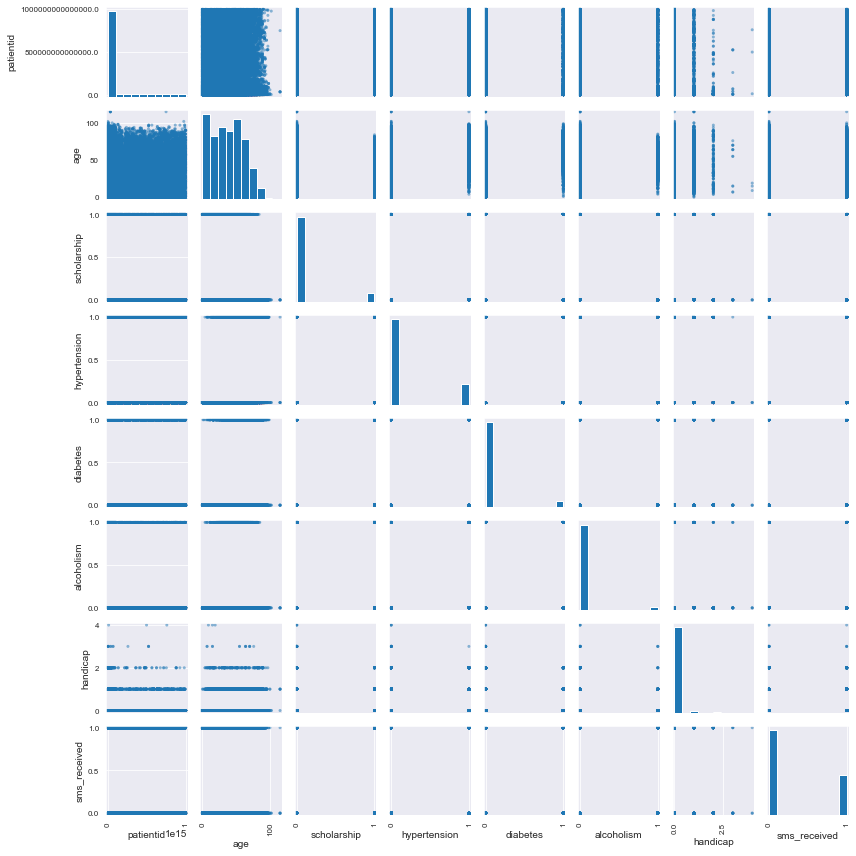

In [11]:
# Trying to quickly spot and prioritrize any trends or patterns 
# in the dataset using a scatter matrix
pd.plotting.scatter_matrix(data, figsize = (12, 12));
plt.tight_layout()

In [12]:
# Helper function to make splicing columns of interest from the dataset easy
def data_munger(columns):
    """
    Returns a slice of the original dataframe, containing the variable of interest and the dependent variable
    
    Parameter
    ---------
    -- columns: str or list of columns of independent variables
    
    Returns
    -------
    A copy of the cleaned dataset, sliced based on the input columns provided
    """
    
    cols = columns
    if (type(cols) == str):
        cols = [cols]
        cols.extend(['no_show'])
    else:
        cols.extend(['no_show'])
    
    return data.copy()[cols]

<a id='q1'></a>
### Research Question 1: Does being on scholarship affect the likelihood of showing up for appointments?

In [13]:
# Gathering the scholarship and no_show columns into a new dataframe
scholarship_data = data_munger('scholarship')
scholarship_data.head()

,scholarship,no_show
0,0,No
1,0,No
2,0,No
3,0,No
4,0,No


In [14]:
# Converting the no_show column to a numeric dataframe
scholarship_data['no_show_numeric'] = data['no_show'].apply(lambda x: 0 if x == 'No' else 1)

In [15]:
# Finding out how many of the records involve patients that are 
# on scholarship and how many do not
scholarship_data.scholarship.value_counts()

0    99665
1    10861
Name: scholarship, dtype: int64

In [16]:
# Converting the value counts to percentages
scholarship_data.scholarship.value_counts()/len(scholarship_data)

0    0.901734
1    0.098266
Name: scholarship, dtype: float64

In [17]:
# Grouping the dataset based on the patient's scholarship status and attendance
sch_df = scholarship_data.groupby(['scholarship', 'no_show']).count()
sch_df

no_show_numeric
scholarship no_show                 
0           No                 79924
            Yes                19741
1           No                  8283
            Yes                 2578

Text(0.5, 1.0, 'Distribution of Patient Records Based on Scholarship Status and Attendance')

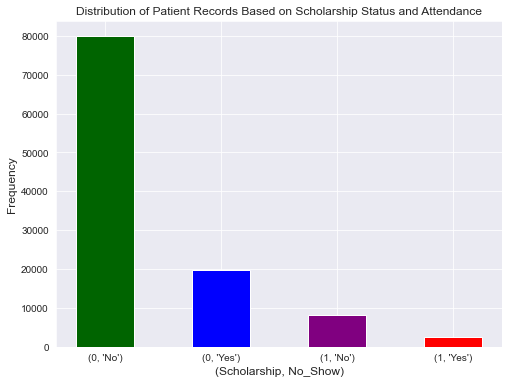

In [18]:
# Visualizing the groupings above using a bar chart
plt.figure(figsize = (8,6))
plt.bar([1,2,3,4], height = sch_df.no_show_numeric, width = 0.5, 
        tick_label = sch_df.index, 
        color = ['darkgreen', 'blue', 'purple', 'red']);
plt.xlabel('(Scholarship, No_Show)', size = 12);
plt.ylabel('Frequency', size = 12);
plt.title('Distribution of Patient Records Based on Scholarship Status and Attendance')

In [19]:
# Converting the values calculated earlier to percentages
proportion_sch = sch_df /sch_df.groupby('scholarship').sum() #a dataframe showing relative proportions with respect to scholarship category
proportion_sch

no_show_numeric
scholarship no_show                 
0           No              0.801926
            Yes             0.198074
1           No              0.762637
            Yes             0.237363

<AxesSubplot:ylabel='scholarship,no_show'>

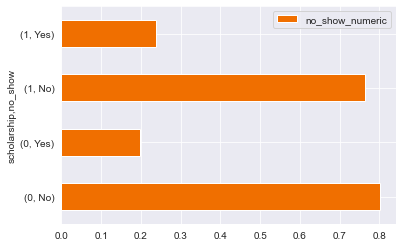

In [20]:
# Plotting these perecentages as a horizontal bar plot
proportion_sch.plot(kind = 'barh', color = '#F06F00');

<a id='q2'></a>
### Research Question 2: Does the age of the patient influence if they will show up or not?

In [21]:
# Gathering the age and no_show columns into a new dataframe
age_data = data_munger('age')
age_data.head(2)

,age,no_show
0,62,No
1,56,No


In [22]:
# Getting some statistics about the age variable
age_data.age.describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: age, dtype: float64

> Mean age for the dataset is <b>37 years</b>

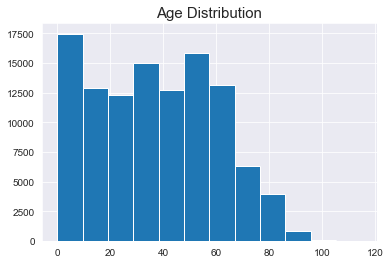

In [23]:
# Plotting the distribution of the ages as a histogram
age_data.hist(figsize = (6,4), bins = 12);
plt.title('Age Distribution', fontsize = 15);

> From the chart above, we can see that most of the patients are between the ages of <b>0</b> and <b>70</b>

In [24]:
# Categorizing the different ages into age groups
bins = [0, 12, 20, 30, 65, 116]
labels = ['kid', 'teenager', 'young adult', 'adult','elderly_person']
age_data['age_category'] = pd.cut(x = age_data.age, bins = bins, labels = labels)
age_data.head()

,age,no_show,age_category
0,62,No,adult
1,56,No,adult
2,62,No,adult
3,8,No,kid
4,56,No,adult


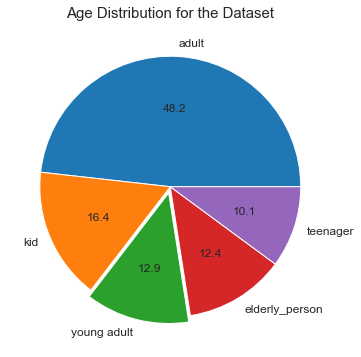

In [25]:
age_distribution = age_data['age_category'].value_counts()

# Visualizing the different age groups that make up this dataset
plt.figure(figsize = (6,6))
plt.pie(age_distribution, labels = age_distribution.index, explode = [0, 0,.05,0,0], 
        textprops = {'fontsize': 12}, autopct='%.1f');
plt.title('Age Distribution for the Dataset', fontsize = 15);

In [26]:
# Grouping the patient records by their age category and if they showed or not
age_group = age_data.groupby(['age_category', 'no_show']).count()
age_group.head()

age
age_category no_show       
kid          No       13829
             Yes       3668
teenager     No        8023
             Yes       2789
young adult  No       10389

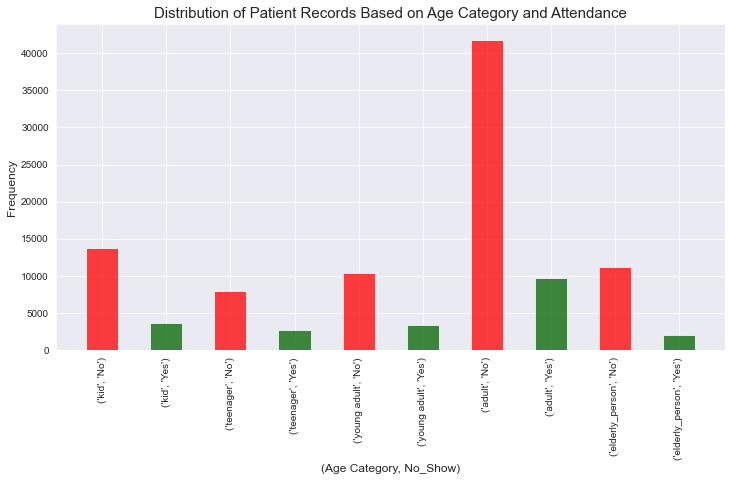

In [27]:
# Visualizing these groupings
plt.figure(figsize = (12,6))
plt.bar(np.arange(1, 1+len(age_group)), height = age_group.age, width = 0.5, 
        tick_label = age_group.index, color = ['#FF0000','darkgreen'], alpha = .75);
plt.xticks(rotation = 90)
plt.xlabel('(Age Category, No_Show)', size = 12)
plt.ylabel('Frequency', size = 12)
plt.title('Distribution of Patient Records Based on Age Category and Attendance', 
          fontsize = 15);

In [28]:
# Converting the count for each age group into percentages
age_group_proportion = age_group.age/age_data.groupby('age_category').count()['age']
age_group_proportion

age_category    no_show
kid             No         0.790364
                Yes        0.209636
teenager        No         0.742046
                Yes        0.257954
young adult     No         0.753755
                Yes        0.246245
adult           No         0.810773
                Yes        0.189227
elderly_person  No         0.844673
                Yes        0.155327
Name: age, dtype: float64

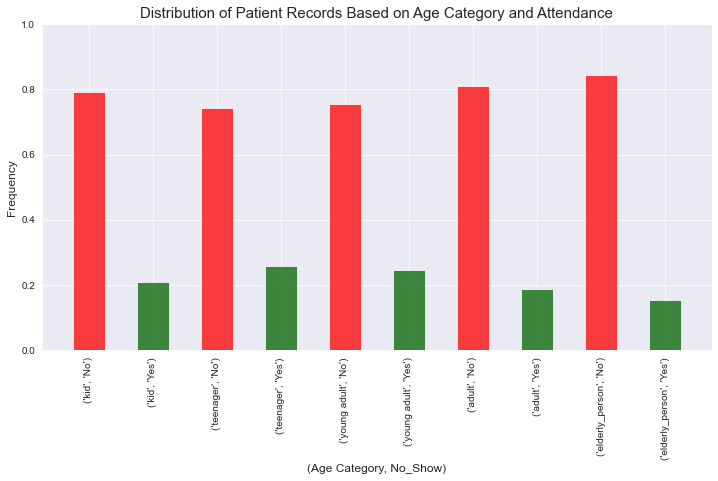

In [29]:
# Visualizing these proportional groupings
plt.figure(figsize = (12,6))
plt.bar(np.arange(1, 1+len(age_group)), height = age_group_proportion, width = 0.5, 
        tick_label = age_group.index, color = ['#FF0000','darkgreen'], alpha = .75)
plt.ylim((0,1))
plt.xticks(rotation = 90)
plt.xlabel('(Age Category, No_Show)', size = 12)
plt.ylabel('Frequency', size = 12)
plt.title('Distribution of Patient Records Based on Age Category and Attendance', 
          fontsize = 15);

<a id='q3'></a>
### Research Question 3: Does the appointment day influence if the patient will show or not?
<ul>
<li>Which days of the week have the most number of patients</li>
<li>Do people show up for their appointments on some days more than others?</li>
</ul>


In [30]:
# Gathering the appointmentday and no_show columns into a new dataframe
appointment_data = data_munger('appointmentday')
appointment_data.head()

,appointmentday,no_show
0,2016-04-29 00:00:00+00:00,No
1,2016-04-29 00:00:00+00:00,No
2,2016-04-29 00:00:00+00:00,No
3,2016-04-29 00:00:00+00:00,No
4,2016-04-29 00:00:00+00:00,No


In [31]:
# Retrieving the day from the appointmentday Timstamp variable
appointment_data['day_of_week'] = appointment_data['appointmentday'].apply(lambda x: x.day_name())
appointment_data.head()

,appointmentday,no_show,day_of_week
0,2016-04-29 00:00:00+00:00,No,Friday
1,2016-04-29 00:00:00+00:00,No,Friday
2,2016-04-29 00:00:00+00:00,No,Friday
3,2016-04-29 00:00:00+00:00,No,Friday
4,2016-04-29 00:00:00+00:00,No,Friday


In [32]:
# Getting the number of appointments made per day
day_of_week_count = appointment_data.day_of_week.value_counts()
day_of_week_count

Wednesday    25867
Tuesday      25640
Monday       22714
Friday       19019
Thursday     17247
Saturday        39
Name: day_of_week, dtype: int64

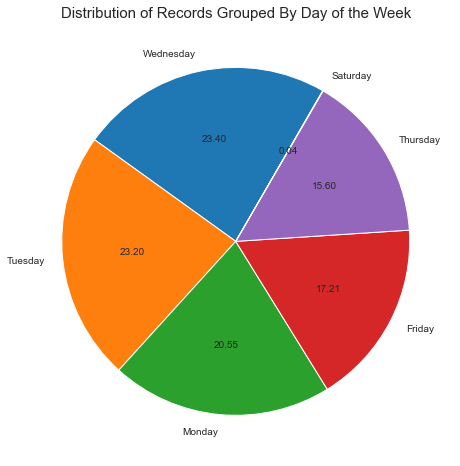

In [33]:
# Plotting the distribution of records grouped by 
# what day of the week the appointment was made
plt.figure(figsize = (8,8))
plt.pie((day_of_week_count*100/len(appointment_data)), 
        labels = day_of_week_count.index, 
        autopct="%.2f", startangle=60);
plt.title('Distribution of Records Grouped By Day of the Week', fontsize = 15);

In [34]:
# Grouping the dataset based on the day_of_week and no_show variables
day_grouping = appointment_data.groupby(['day_of_week', 'no_show'])['appointmentday'].count()
day_grouping2 = appointment_data.groupby(['day_of_week']).count()['no_show']

# Calculating the percentage of occurence for each of these groupings
day_group_prop = day_grouping/day_grouping2

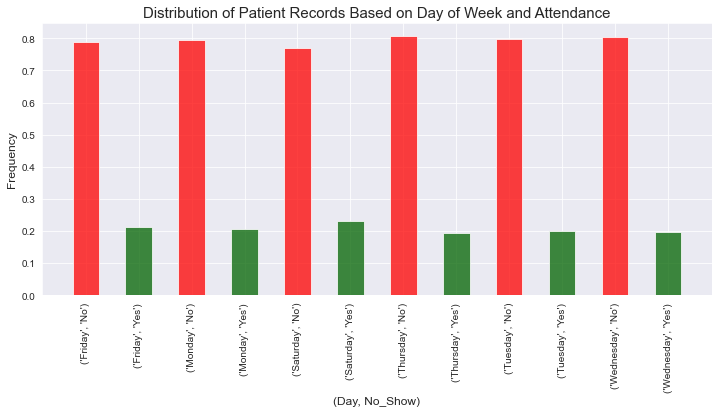

In [35]:
# Visualizing these groupings
plt.figure(figsize = (12, 5))
plt.bar(np.arange(1, 1+len(day_grouping)), height = day_group_prop, width = 0.5, 
        tick_label = day_grouping.index, color = ['#FF0000','darkgreen'], alpha = .75)
plt.xticks(rotation = 90)
plt.xlabel('(Day, No_Show)', size = 12)
plt.ylabel('Frequency', size = 12)
plt.title('Distribution of Patient Records Based on Day of Week and Attendance', fontsize = 15);

<a id='q4'></a>
### Research Question 4: Do Regular Appointment Makers show up to subsequent ones?

> People with records of many appointments, how does their attendance progress over time?

In [36]:
# Gathering the patientid, appointmentday and no_show columns into a new dataframe
patient_data = data_munger(['patientid', 'appointmentday'])
patient_data['no_show_numeric'] = patient_data.no_show.apply(lambda x: 1 if (x=='No') else 0)
patient_data.head()

,patientid,appointmentday,no_show,no_show_numeric
0,2.987250e+13,2016-04-29 00:00:00+00:00,No,1
1,5.589978e+14,2016-04-29 00:00:00+00:00,No,1
2,4.262962e+12,2016-04-29 00:00:00+00:00,No,1
3,8.679512e+11,2016-04-29 00:00:00+00:00,No,1
4,8.841186e+12,2016-04-29 00:00:00+00:00,No,1


In [37]:
# Dropping patient records where the patient id is not repeated in the dataset
patient_data = patient_data[patient_data.patientid.duplicated(keep = False)]

In [38]:
# Sorting the data by patientid and appointmentday
patient_data.sort_values(by = ['patientid', 'appointmentday'], inplace = True)
patient_data.reset_index(inplace = True, drop = True)
patient_data.head()

,patientid,appointmentday,no_show,no_show_numeric
0,22638656.0,2016-05-03 00:00:00+00:00,No,1
1,22638656.0,2016-06-08 00:00:00+00:00,No,1
2,52168938.0,2016-05-16 00:00:00+00:00,No,1
3,52168938.0,2016-05-17 00:00:00+00:00,No,1
4,64851211.0,2016-05-13 00:00:00+00:00,Yes,0


In [39]:
# Creating a sequential patientid for the records still in the dataframe
idx = list(patient_data.patientid.value_counts().index)
patient_data.patientid = patient_data.patientid.apply(lambda x: idx.index(x))
patient_data.head()

,patientid,appointmentday,no_show,no_show_numeric
0,24378,2016-05-03 00:00:00+00:00,No,1
1,24378,2016-06-08 00:00:00+00:00,No,1
2,23943,2016-05-16 00:00:00+00:00,No,1
3,23943,2016-05-17 00:00:00+00:00,No,1
4,10847,2016-05-13 00:00:00+00:00,Yes,0


In [40]:
# Getting total number of unique patientids in the record
patient_data.patientid.max()

24378

> Reducing the number of patients to aid visualization when plotting<br>
Total number of unique patients in the dataframe currently are **24378**

In [41]:
(patient_data.patientid.value_counts() >8).sum()

437

In [42]:
idx2 = list(patient_data.patientid.value_counts().index[:437])

In [43]:
patient_data2 = patient_data.copy().query('patientid in @idx2')
patient_data2['patientid'] = patient_data2.patientid.apply(lambda x: idx2.index(x))
patient_data2.head()

,patientid,appointmentday,no_show,no_show_numeric
462,234,2016-05-03 00:00:00+00:00,No,1
463,234,2016-05-05 00:00:00+00:00,No,1
464,234,2016-05-10 00:00:00+00:00,No,1
465,234,2016-05-12 00:00:00+00:00,No,1
466,234,2016-05-17 00:00:00+00:00,No,1


In [44]:
patient_data2.reset_index(drop= True, inplace = True)
patient_data2.head()

,patientid,appointmentday,no_show,no_show_numeric
0,234,2016-05-03 00:00:00+00:00,No,1
1,234,2016-05-05 00:00:00+00:00,No,1
2,234,2016-05-10 00:00:00+00:00,No,1
3,234,2016-05-12 00:00:00+00:00,No,1
4,234,2016-05-17 00:00:00+00:00,No,1


> Sorting the records for each patient based on the chronology of the appointment day

In [45]:
patient_data2.sort_values(by =['patientid', 'appointmentday'], ignore_index=True, 
                          inplace = True)
patient_data2.head()

,patientid,appointmentday,no_show,no_show_numeric
0,0,2016-04-29 00:00:00+00:00,No,1
1,0,2016-04-29 00:00:00+00:00,No,1
2,0,2016-04-29 00:00:00+00:00,No,1
3,0,2016-05-02 00:00:00+00:00,No,1
4,0,2016-05-02 00:00:00+00:00,No,1


In [46]:
%%time
patient_data2['position'] = patient_data2.apply(func = (lambda x: list(patient_data2.query('patientid == @x["patientid"]')['appointmentday']).index(x['appointmentday']) + 1),
                                                axis = 1)

Wall time: 5min 17s


In [47]:
patient_data2.head()

,patientid,appointmentday,no_show,no_show_numeric,position
0,0,2016-04-29 00:00:00+00:00,No,1,1
1,0,2016-04-29 00:00:00+00:00,No,1,1
2,0,2016-04-29 00:00:00+00:00,No,1,1
3,0,2016-05-02 00:00:00+00:00,No,1,4
4,0,2016-05-02 00:00:00+00:00,No,1,4


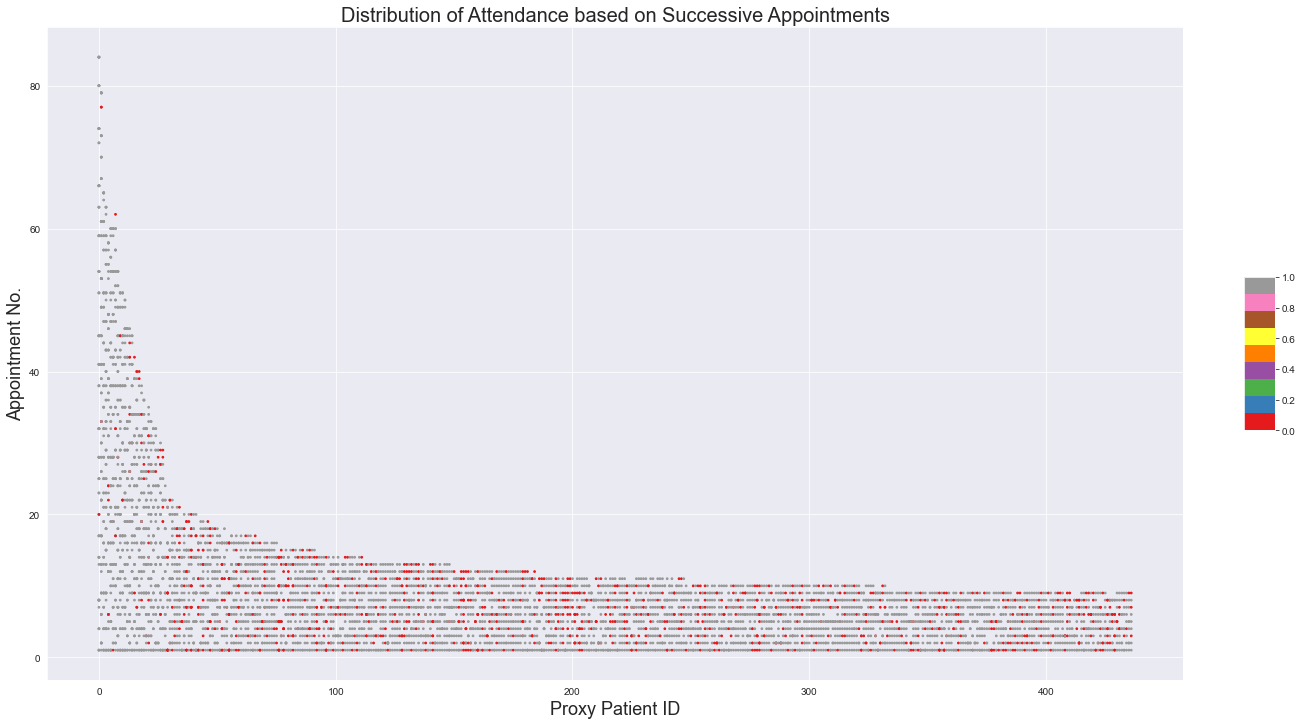

In [48]:
# Visualization of how attendance for people with multple records progresses over time
plt.figure(figsize = (22, 12))
plt.scatter('patientid', 'position', c = 'no_show_numeric', s=3, data = patient_data2,
            cmap = 'Set1', alpha =1)
plt.colorbar(plt.cm.ScalarMappable(cmap='Set1'), ax=plt.gca(),
             fraction = .025, aspect = 5)
plt.ylabel('Appointment No.', fontsize = 18)
plt.xlabel('Proxy Patient ID', fontsize = 18)
plt.title('Distribution of Attendance based on Successive Appointments', fontsize = 20);

<a id='q5'></a>
### Research Question 5: What is the relationship between gender and the statistics of those who showed up?

In [49]:
# Gathering the gender and no_show columns into a new dataframe
gender_data = data_munger('gender')
gender_data.head()

,gender,no_show
0,F,No
1,M,No
2,F,No
3,F,No
4,F,No


In [50]:
gender_data['no_show_numeric'] = gender_data.no_show.apply(lambda x: 0 if (x =="No") else 1)
gender_data.head()

,gender,no_show,no_show_numeric
0,F,No,0
1,M,No,0
2,F,No,0
3,F,No,0
4,F,No,0


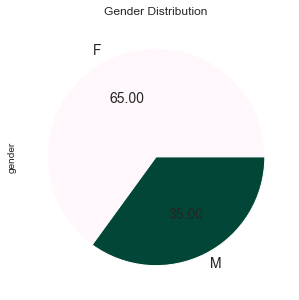

In [51]:
# Visualizing the gender distribution in the dataset
gender_data.gender.value_counts().plot(kind = 'pie', title = 'Gender Distribution', 
                                       colormap = 'PuBuGn', autopct = "%.2f", 
                                      figsize = (5,5), fontsize = 14);

In [52]:
# Grouping the data by gender and attendance
gender_grouping = gender_data.groupby(['gender', 'no_show']).count()['no_show_numeric']
gender_grouping

gender  no_show
F       No         57245
        Yes        14594
M       No         30962
        Yes         7725
Name: no_show_numeric, dtype: int64

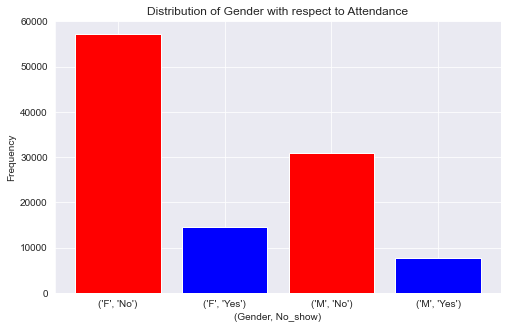

In [53]:
# Visualizing the size of the groups
plt.figure(figsize = (8,5))
plt.bar([1,2,3,4], gender_grouping, tick_label = gender_grouping.index, 
        color = ['r', 'b'])
plt.xlabel('(Gender, No_show)')
plt.ylabel('Frequency')
plt.title('Distribution of Gender with respect to Attendance');

In [54]:
# Converting these group counts to percentages
gender_proportions = gender_grouping / gender_data.groupby('gender').count()['no_show_numeric']
gender_proportions

gender  no_show
F       No         0.796851
        Yes        0.203149
M       No         0.800321
        Yes        0.199679
Name: no_show_numeric, dtype: float64

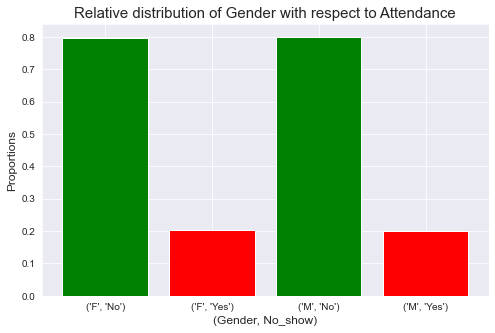

In [55]:
# Visualizing the percentage data
plt.figure(figsize = (8,5))
plt.bar([1,2,3,4], gender_proportions, tick_label = gender_proportions.index, 
        color = ['g', 'r'])
plt.xlabel('(Gender, No_show)', fontsize = 12)
plt.ylabel('Proportions', fontsize = 12)
plt.title('Relative distribution of Gender with respect to Attendance', fontsize = 15);

<a id='q6'></a>
### Research Question 6:  Which hospital locations have a higher percentage of people showing up for their appointments?

In [56]:
# Gathering the neighbourhood and no_show columns into a new dataframe
neighbourhood_data = data_munger('neighbourhood')
neighbourhood_data.head()

,neighbourhood,no_show
0,JARDIM DA PENHA,No
1,JARDIM DA PENHA,No
2,MATA DA PRAIA,No
3,PONTAL DE CAMBURI,No
4,JARDIM DA PENHA,No


In [57]:
# Counting the number of patient records per location
nhood_grouping = neighbourhood_data.groupby('neighbourhood').count().sort_values('no_show', ascending = False)
nhood_grouping.head()

,no_show
neighbourhood,
JARDIM CAMBURI,7717
MARIA ORTIZ,5805
RESISTÊNCIA,4431
JARDIM DA PENHA,3877
ITARARÉ,3514


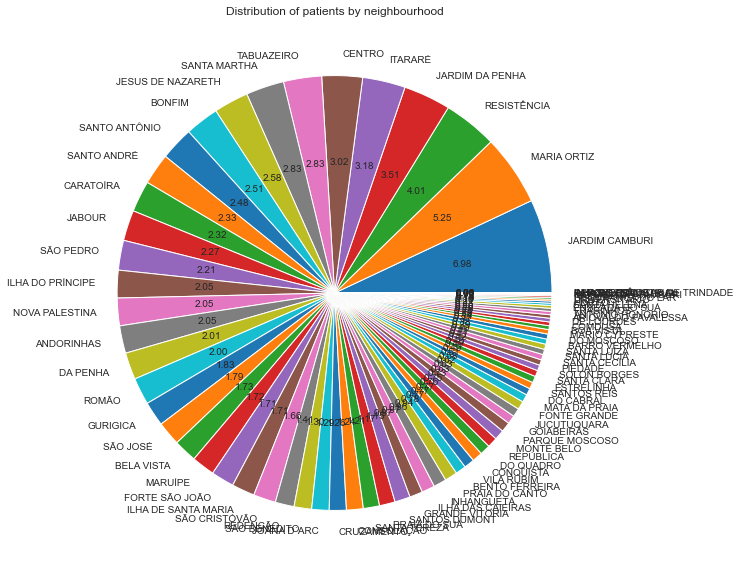

In [58]:
# Plotting this count
plt.figure(figsize = (10,10))
plt.pie(nhood_grouping.no_show, labels = nhood_grouping.index, autopct='%.2f')
plt.title('Distribution of patients by neighbourhood');

> #### Records for appointments where the patient showed up

In [59]:
# Counting the number of patient records per location
nhood_show_grouping = neighbourhood_data.query('no_show == "No"').groupby('neighbourhood').count().reindex_like(nhood_grouping)
nhood_show_grouping.tail()

,no_show
neighbourhood,
ILHA DO BOI,32.0
ILHA DO FRADE,8.0
AEROPORTO,7.0
ILHAS OCEÂNICAS DE TRINDADE,NaN
PARQUE INDUSTRIAL,1.0


In [60]:
# Filling null values
nhood_show_grouping.fillna(0, inplace = True)
nhood_show_grouping.isna().sum()

no_show    0
dtype: int64

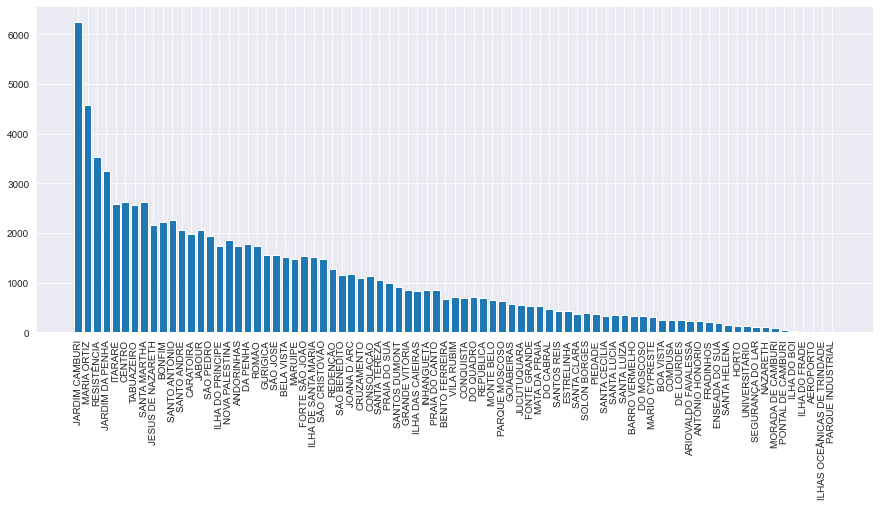

In [61]:
# Plotting the count
plt.figure(figsize = (15, 6))
plt.bar(nhood_show_grouping.index, nhood_show_grouping.no_show);
plt.xticks(rotation = 90);

In [62]:
# Converting the counts to percentages
nhood_show_percent = nhood_show_grouping * 100/ nhood_grouping
nhood_show_percent.sort_values('no_show', ascending = False, inplace = True)

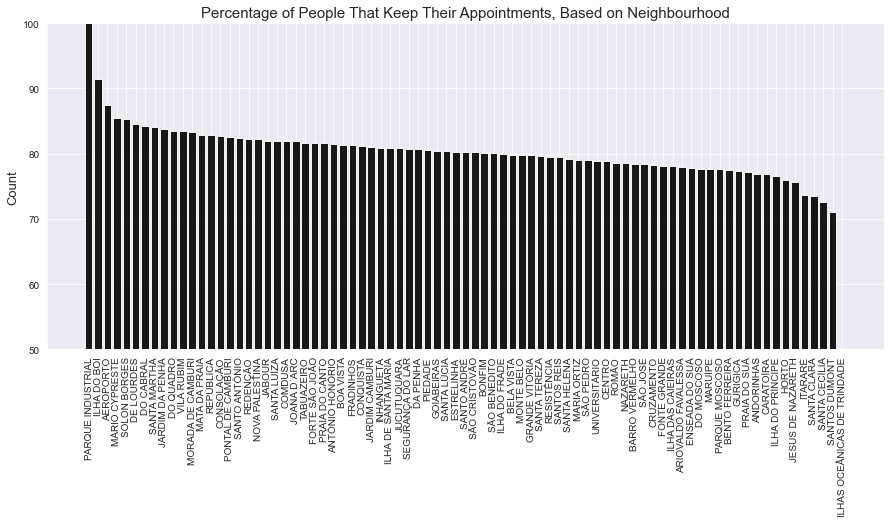

In [63]:
# Plotting the percentages
plt.figure(figsize = (15, 6))
plt.bar(nhood_show_percent.index, nhood_show_percent.no_show, color = 'black', alpha = .9)
plt.ylim((50, 100))
plt.ylabel('Count', fontsize = 13)
plt.xticks(rotation = 90)
plt.title('Percentage of People That Keep Their Appointments, Based on Neighbourhood', 
          fontsize = 15);

> #### Records for appointments where the patient did not show up

In [64]:
# Counting the number of patient records per location
nhood_noshow_grouping = neighbourhood_data.query('no_show == "Yes"').groupby('neighbourhood').count().reindex_like(nhood_grouping)
nhood_noshow_grouping.tail()

,no_show
neighbourhood,
ILHA DO BOI,3.0
ILHA DO FRADE,2.0
AEROPORTO,1.0
ILHAS OCEÂNICAS DE TRINDADE,2.0
PARQUE INDUSTRIAL,NaN


In [65]:
# Filling null values
print(nhood_noshow_grouping.isna().sum())
nhood_noshow_grouping.fillna(0, inplace = True)
nhood_noshow_grouping.isna().sum()

no_show    1
dtype: int64


no_show    0
dtype: int64

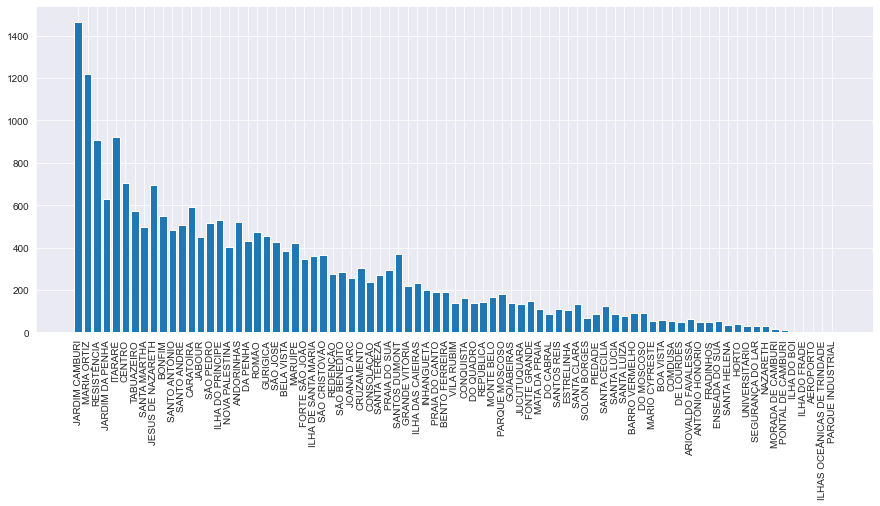

In [66]:
# Plotting the count
plt.figure(figsize = (15, 6))
plt.bar(nhood_noshow_grouping.index, nhood_noshow_grouping.no_show);
plt.xticks(rotation = 90);

In [67]:
# Converting the counts to percentages
nhood_noshow_percent = nhood_noshow_grouping * 100/ nhood_grouping
nhood_noshow_percent.sort_values('no_show', ascending = False, inplace = True)

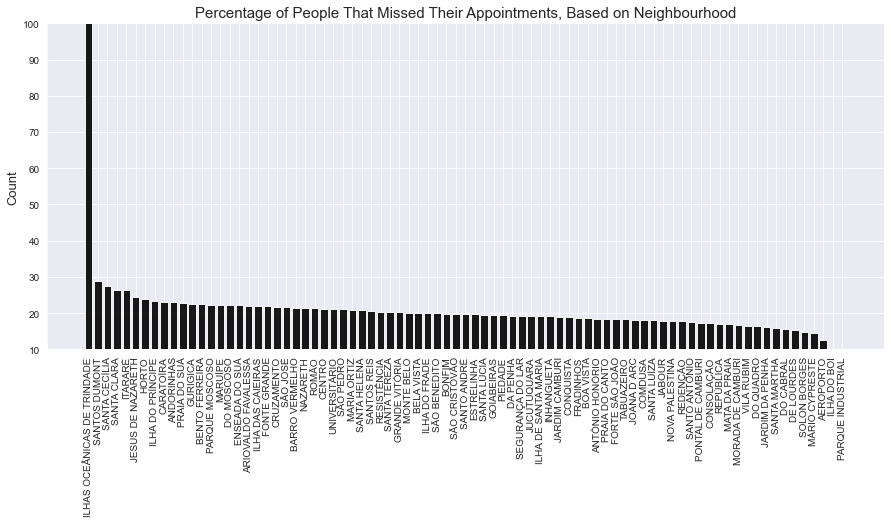

In [68]:
# Plotting the percentages
plt.figure(figsize = (15, 6))
plt.bar(nhood_noshow_percent.index, nhood_noshow_percent.no_show, 
        color = 'black', alpha = .9)
plt.ylim((10, 100))
plt.ylabel('Count', fontsize = 13)
plt.xticks(rotation = 90)
plt.title('Percentage of People That Missed Their Appointments, Based on Neighbourhood', 
          fontsize = 15);

<a id='conclusions'></a>
## Conclusions


### <a href="#q1">Scholarship Data</a>

In this section, I set out to investigate if people on scholarship show up for appointments more than those not on scholarship.<br><br>
The results obtained via exploratory analysis show that while 90.2% of the records involve patients not on scholarship and 9.8% involve patients on scholarship, 
<ul>
<li>80.2% of those without scholarship showed up for their scheduled appointment, while roughly 19.8% did not.</li>
<li>Also, among those with a scholarship, 76.2% stuck to their scheduled appointment while ~23.7% did not.</li>
</ul>

### <a href="#q2">Age Data</a>
The second research question was to investigate how the age of the patient influences if they will show up or not.<br>
To properly understand this, the patients were grouped into age categories, to aid data wrangling and visualization. These age categories are:
<ul>
    <li>Kid: 0-12 years</li>
    <li>Teenager: 12-19 years</li>
    <li>Young adult: 20-30 years</li>
    <li>Adult: 30-65 years</li>
    <li>Elderly people: >65 years</li>
</ul>

The age distribution for these categories was slightly skewed, with the adult group comprising 48% of the records.<br>
This was not evident in the distribution of attendance for the categories though, as across the different age categories, 74-85% of the patients records were for appointments where the patient showed up.<br><br>
However, in this dataset, the elderly people category have the highest proportion of people who kept to their appointmenmt, at 85%, while teenagers have the lowest at 74%


### <a href="#q3">Appointment Data</a>
  For this section we investigated the appointmentday records, by trying to answer the following questions:
<ul>
<li>Which days of the week have the most number of patients</li>
<li>If people showed up for their appointments on some days more than others?</li>
</ul>

Exploratory analysis shows that Wednesday and Tuesday are the days with the most patient records having 23.40% and 23.20% of the records respectively during the time duration these records were being collected.<br>
Saturday is the day with the least amount of records, comprising 0.04% of the records.<br>
There are no records for Sunday.</br>
<br>
<br>
When the dataset is grouped by the day of the week, 77-80% of the records per day are for patients that showed up for the appointment, while 20-23% did not stick to their appointment.
<br>

#### <a href="#q4">A follow up question was to find out if people that have a record of multiple appointments showed up more regularly for subsequent ones</a>
In other words, a visualization of how their attendance progressed over time.
<br>This required considerable data wrangling to:
<ul>
    <li>Pull records from the dataset where the patientID was registered for multiple appointments</li>
    <li>Sort this dataset by number of appointments made per patient</li>
    <li>Drop some of the records with fewer number of appointments in order that the visualization is not cluttered</li>
    <li>For the data left, sort the appointment records for each patient by the date the appointment was made</li>
    <li>Finally, plot the sorted data, making sure the chronology is maintained</li>
</ul>

The plot shows that patients with 22 appointments and above kept to most of their appointments from the beginning, and maintained this consistency throughout the duration this dataset was recorded.

### <a href="#q5">Gender Data</a>

The fifth research question is an attempt to understand the relationship, if any, between the gender distribution of the patients and them keeping their appointment.<br>
The dataset was first grouped by gender to understand the distribution, showing that:

<ul>
    <li>65% of the patient records are for a female</li>
    <li>35% of the patient records are for a male</li>
</ul>

For the 2 gender categories, approximately 80% of the patients show up for their appointments, while 20% do not.<br>

### <a href="#q6">Neighbourhood Data</a>

This final section sought to explore patterns between the hospital's location and the patient's attendance to understand if some hospital locations have a markedly higher percentage of people showing up for their appointments?

Exploratory analysis showed that:
<ul>
<li>Most of the hospitals had 70-85% of their records comprising of patients that showed up for their appointment with outliers being hopital locations with very few patient records.</li>
<li>The converse was seen in the case of appointments that patients did not stick to, comprising 15-30% of the records.</li>
</ul>

<a id='limitations'></a>
### Limitations

In exploring this dataset, setbacks encountered include:
<ul>
<li>Insufficient sample size for several neighbourhoods in the dataset, allowing the statistics for those regions to be easily influenced or volatile.</li>
<li>The dataset was skewed, typically having one category more abundant than another in several variables. In this work, this was addressed by using proportional representations, but is an issue that would require more detailed preprocessing steps; e.g data augmentation; if the data is to be modelled in order to avoid biased predictions.
    <ul>Features where this issue was most prominent in include:
        <li>Scholarship</li>
        <li>SMS Received</li>
        <li>Handicap</li>
        <li>Gender</li>
    </ul>
</li>

<li>This last one is more of a disclaimer than a limitation. This exploratory analysis only examines corelations, and does not in any way imply that causation automatically follows correlation. </li>

</ul>

<a id='references'></a>
### References

1. <a href = 'https://stackoverflow.com'>Stack Overflow</a>: For programming tips and errors
<br>
2. <a href = 'https://www.kaggle.com/datasets/joniarroba/noshowappointments'>Kaggle</a>: For further clarification about the dataset's features

<a href="#top">Back to top</a>